<a href="https://colab.research.google.com/github/Shayros/Developing-hypotheses/blob/master/Using_datasets_to_support_your_hypothesis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First task: Using datasets to support your hypothesis


---

The page that we are going to be using  in this project is the [NCBI Gene Expression Ombnibus](https://www.ncbi.nlm.nih.gov/geo/)

"GEO is a public functional genomics data repository supporting MIAME-compliant data submissions. Array- and sequence-based data are accepted. Tools are provided to help users query and download experiments and curated gene expression profiles"

![NCBI Geo site](https://NCBI%20Geo%20site.png)

 # 1. Downloading the datasets

Once you arrived at the site, you are going to search for the things that you would like to study. For instance, you can write in the search breast cancer and all the data available that used breast cancer will show up.

**As an example I will be using two datasets of RNA-seq expression of lung epithelial and mesenchymal cells at different embryonic stage:**

*GSM3027039 (lung 10.5 embryo expression)

*GSM3027047 (lung 11.5 embryo expression)


To download the data you can go to end and dowload the series matrix. GSE files are the one that contain the data to be analyzed and GPL files contain the annotation. When working with your own questions, I recommend downloading both to help you know what mRNA data you are analyzing.

Here is an example that will help you download datasets and save the data when the files are added as a supplement information instead of a series matrix. First, you can start by downloading the data in http format and save it as a txt file. If this doesn't work for you please follow the steps below.

-Look on this data on the search bar


-In the bottom of the pages sometimes are instruction that will help you find the data. As you see in the instruction "Raw data are available in SRA"

![Finding the data step one](https://Finding%20the%20data%20step%20one.png)

-Now, find your dataset!

![Finding the data step two](https://Finding%20the%20data%20step%20two.png)


-Downloading the datasets

![Finding the data step three](https://Finding%20the%20data%20step%20three.png)


-Final step

![Finding the data last step](https://Finding%20the%20data%20last%20step.png)


**You have your data. Now what?**

-You need to filter the data either in Excel or python to facilitates its use.

#2. Cleaning information on Excel

First open the text file on Excel and get rid of the unnecessary information by highlighting the numbers and presing delete. You can also do a search for the specific mRNA of interest if the data is already annotated. In this case the data is already annotated. Theredore, I will select **Timp2** in our search.

![Searching for your mRNA in Excel](https://Searching%20for%20your%20mRNA%20in%20Excel.png)


In the case of this data the cells are taken from more than one embryo. However, since the samples are taken from the same research group, equipment, strain of animals, gender, and at the same embryonic stage you can either combine the epithelial samples together and the mesenchymal if your question is to observe the differences between both samples. Nevertheless, if you are more interested in see variability between epithelial and mesenchymal cells between different individuals you can divide the samples per embryo.

*For the purpose of this study we are going to combine the epithelial samples together and do the same with the mesenchymal cells.*

Since we will be looking for Timp2, you can delete the rest of the data leaving only Timp2 in the excel sheet. Then combine the information in a single column and transpose the data. This will allow you to go from vertical to horizontal to facilitate moving the information to python.

# 3. Analyzing data in python and producing graphs

*GSM3027039 (lung 10.5 embryo expression)*

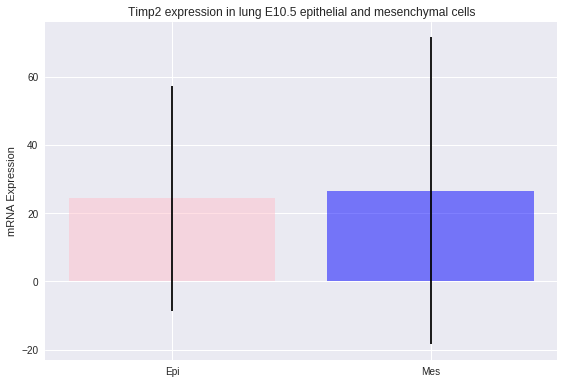

t = 0.18786636459852307
p = 0.8519663195255461


In [1]:
import numpy as np
from scipy import stats
E2E=np.array ([101.84, 35.15, 0.00, 51.44, 0.00, 0.00,99.63,23.94, 0.00, 8.13, 0.00])
E1E=np.array ([0.00, 10.87, 0.00, 41.46, 17.58])
E2M=np.array([72.37, 0.00,0.00,	0.00,0.00, 0.00,10.45, 0.00,91.36,14.49,120.26, 3.06, 114.54,0.00])
E1M=np.array([35.96, 2.68,204.7, 23.24, 28.44, 0.00,57.47, 29.02, 0.00,	2.51, 13.5, 3.91, 23.64, 6.23, 0.00,0.00,0.00,0.00,	45.02, 0.00])

#Combine the arrays from the different measurements into one array
Epi=np.concatenate([E1E] +  [E2E])
Mes=np.concatenate([E1M] + [E2M])


#Calculate the mean
Epi_mean=np.mean(Epi)
Mes_mean=np.mean(Mes)

#Calculate Standard deviation
Epi_std=np.std(Epi)
Mes_std=np.std(Mes)

# Error bars
Cell_types=['Epi', 'Mes']
x_pos=np.arange(len(Cell_types))
meanbars=[Epi_mean, Mes_mean]
error=[Epi_std, Mes_std]

import matplotlib.pyplot as plt

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, meanbars, color=['pink', 'blue'], yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mRNA Expression')
ax.set_xticks(x_pos)
ax.set_xticklabels(Cell_types)
ax.set_title('Timp2 expression in lung E10.5 epithelial and mesenchymal cells')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Timp2_mRNAexpression_E10.5.png')
plt.show()

#Compare to the internal scipy function
t, p = stats.ttest_ind(Mes,Epi, equal_var=False)
print("t = " + str(t))
print("p = " + str(p))

*GSM3027047 (lung 11.5 embryo expression)*


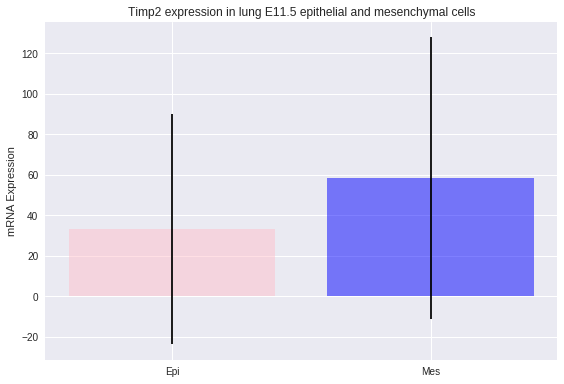

t = 1.2774824478919518
p = 0.20863320356230441


In [2]:
import numpy as np
from scipy import stats
E2E=np.array ([19.83, 67.81, 0.00])
E1E=np.array ([4.22, 190.49, 0.00, 0.00, 64.77, 0.00, 5.15, 0.00,79.94, 19.73, 0.00, 0.00, 0.00, 174.08,4.64, 0.00])
E2M=np.array([5.15, 0.00, 0.00, 0.00,8.77,68.86,73.01,174.58, 0.00,	23.24, 30.73, 35.16,0.00, 126.49, 73.18, 73.03])
E1M=np.array([255.61, 15.31, 0.00, 52.57, 98.65, 24.65, 46.29, 217.5])

#Combine the arrays from the different measurements into one array
Epi=np.concatenate([E1E] +  [E2E])
Mes=np.concatenate([E1M] + [E2M])


#Calculate the mean
Epi_mean=np.mean(Epi)
Mes_mean=np.mean(Mes)

#Calculate Standard deviation
Epi_std=np.std(Epi)
Mes_std=np.std(Mes)

# Error bars
Cell_types=['Epi', 'Mes']
x_pos=np.arange(len(Cell_types))
meanbars=[Epi_mean, Mes_mean]
error=[Epi_std, Mes_std]

import matplotlib.pyplot as plt

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, meanbars, color=['pink', 'blue'], yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mRNA Expression')
ax.set_xticks(x_pos)
ax.set_xticklabels(Cell_types)
ax.set_title('Timp2 expression in lung E11.5 epithelial and mesenchymal cells')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Timp2_mRNAexpression_E11.5 lung.png')
plt.show()

# t-test with internal scipy function
t, p = stats.ttest_ind(Mes,Epi, equal_var=False)
print("t = " + str(t))
print("p = " + str(p))

# Resources

The site below provide more information regarding different statistical analysis. It might help you decide which analysis is best for your data.

**Statistics in Python** -https://www.scipy-lectures.org/packages/statistics/index.html

# Reference

1. **Graph and error bars** -https://pythonforundergradengineers.com/python-matplotlib-error-bars.html
